# **Data preparation for Machine Learning-based SAR image processing and analysis**


Synthetic Aperture Radar (SAR) data is nowadays a largely know tool in many remote sensing applications. Used by itself or jointly together with other image modalities, SAR can largely benefit from the use of machine learning approaches for many different applications, ranging from signal processing to image processing, to end-user applications.
Due to its unique imaging mechanism, SAR images require specific preprocessing techniques to prepare them for machine learning tasks such as despeckling, segmentation, and classification.
This notebook focuses on two main preprocessing steps, such as (1) statistical properties of SAR data and (2) data preprocessing.

## **1. Statistical properties of SAR data**

### **Amplitude, intensity, and phase**

**Amplitude and intensity**: SAR data is complex-valued, where amplitude is the magnitude of the complex value, and intensity is its squared magnitude.

**Phase**: The phase refers to the angular component of the complex-valued SAR image.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, special

# Load a sample SAR image
# Simulated data (noisy)
# sar_image = 25 * (np.random.randn(256, 256) + 1j * np.random.randn(256, 256))

# Sample SAR data - Full image
#sar_image = np.load('sar_image.npy')

# Sample SAR data: distributed scatterer
#sar_image = np.load('sar_crop_distributed.npy')

# Sample SAR data: extended scatterer
sar_image = np.load('sar_crop_extended.npy')

# Sample SAR data: point scatterer
# sar_image = np.load('sar_crop_point.npy')

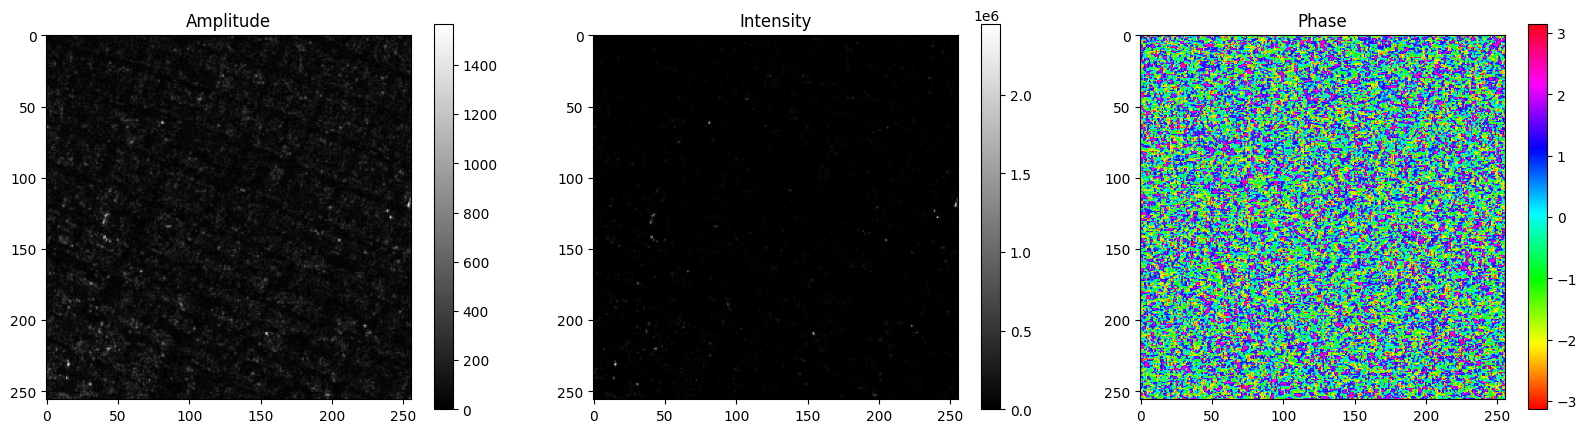

Text(0.5, 1.0, 'Normalized phase histogram')

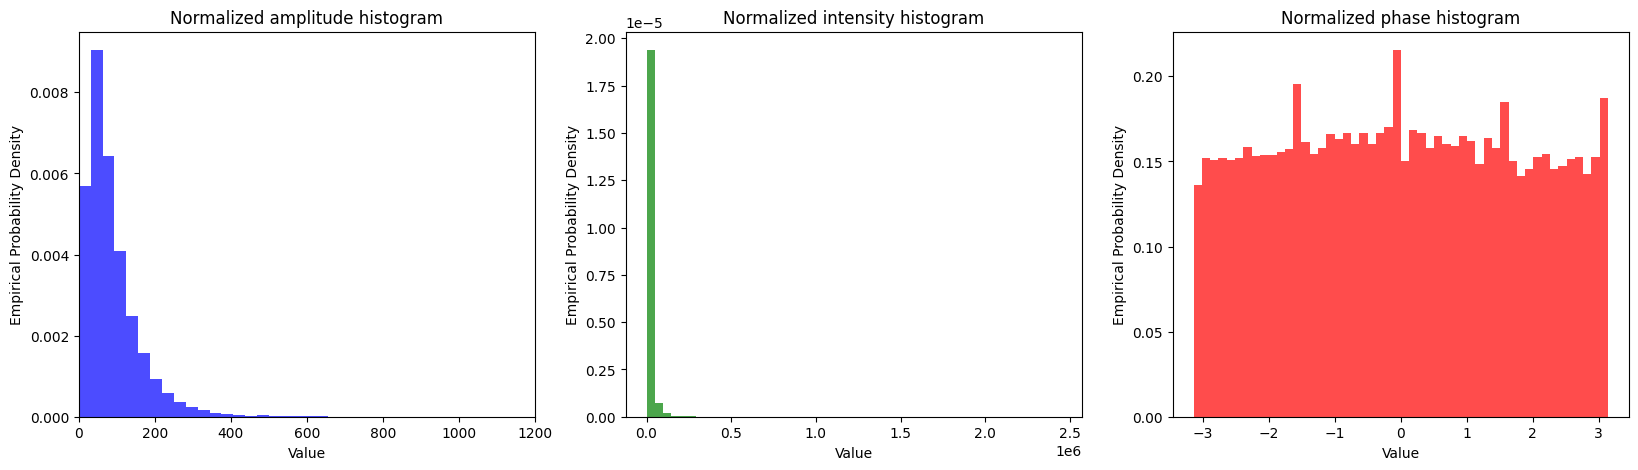

In [ ]:
# Compute amplitude, intensity, and phase
amplitude = np.abs(sar_image)
intensity = np.square(amplitude)
phase = np.angle(sar_image)

# Plot amplitude, intensity, and phase
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(amplitude, cmap='gray')
plt.title('Amplitude')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(intensity, cmap='gray')
plt.title('Intensity')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(phase, cmap='hsv')
plt.title('Phase')
plt.colorbar()
plt.show()

# Plot normalized histograms
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.hist(amplitude.ravel(), bins=50, density=True, color='blue', alpha=0.7)
plt.xlim(0, 1200)
plt.xlabel('Value')
plt.ylabel('Empirical Probability Density')
plt.title('Normalized amplitude histogram')

plt.subplot(1, 3, 2)
plt.hist(intensity.ravel(), bins=50, density=True, color='green', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Empirical Probability Density')
plt.title('Normalized intensity histogram')

plt.subplot(1, 3, 3)
plt.hist(phase.ravel(), bins=50, density=True, color='red', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Empirical Probability Density')
plt.title('Normalized phase histogram')

### **Analysis of real and imaginary parts**

**Real and imaginary parts**: SAR data consists of real and imaginary components, which are useful for certain transformations and analyses.

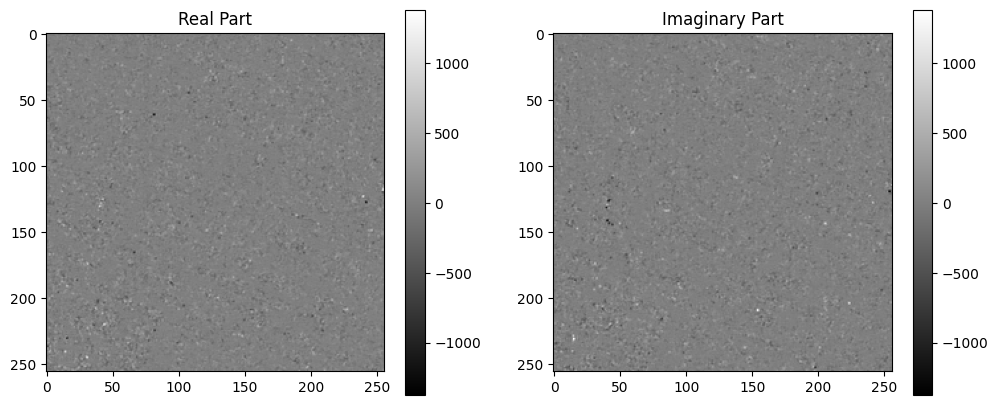

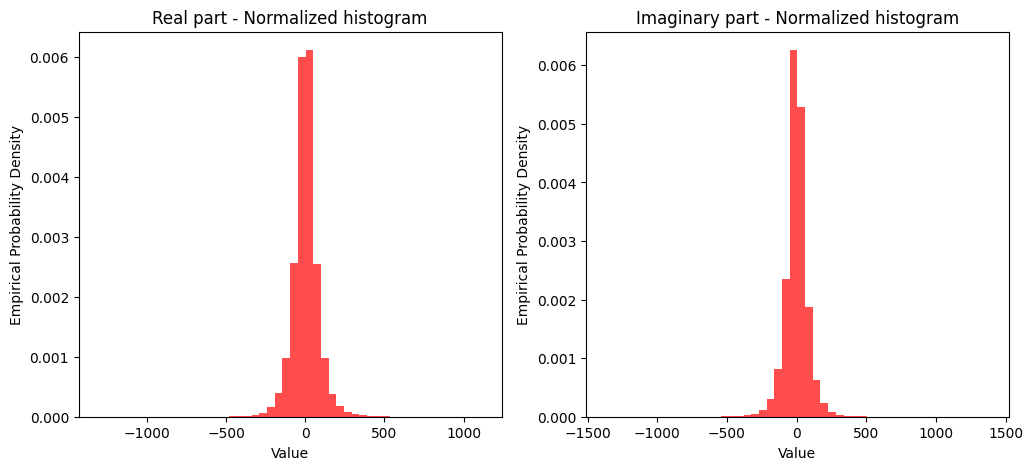

In [ ]:
# Select real and imaginary parts
real_part = np.real(sar_image)
imaginary_part = np.imag(sar_image)

mmin = np.min(np.minimum(real_part, imaginary_part))
mmax = np.max(np.maximum(real_part, imaginary_part))

# Plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(real_part, cmap='gray', vmin=mmin, vmax=mmax)
plt.title('Real Part')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(imaginary_part, cmap='gray', vmin=mmin, vmax=mmax)
plt.title('Imaginary Part')
plt.colorbar()
plt.show()

# Plot histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(real_part.ravel(), bins=50, density=True, color='red', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Empirical Probability Density')
plt.title('Real part - Normalized histogram')


plt.subplot(1, 2, 2)
plt.hist(imaginary_part.ravel(), bins=50, density=True, color='red', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Empirical Probability Density')
plt.title('Imaginary part - Normalized histogram')

plt.show()

## **2. Preprocessing of SAR data**

### **How to correctly visualize amplitude and intensity data**

In [ ]:
## Load a sample SAR image ##

# Simulated data (noisy)
#sar_image = 25 * (np.random.randn(256, 256) + 1j * np.random.randn(256, 256))

# Sample SAR data - Full image
#sar_image = np.load('sar_image.npy')

# Sample SAR data: distributed scatterer
# sar_image = np.load('sar_crop_distributed.npy')

# Sample SAR data: extended scatterer
# sar_image = np.load('sar_crop_extended.npy')

# Sample SAR data: point scatterer
# sar_image = np.load('sar_crop_point.npy')

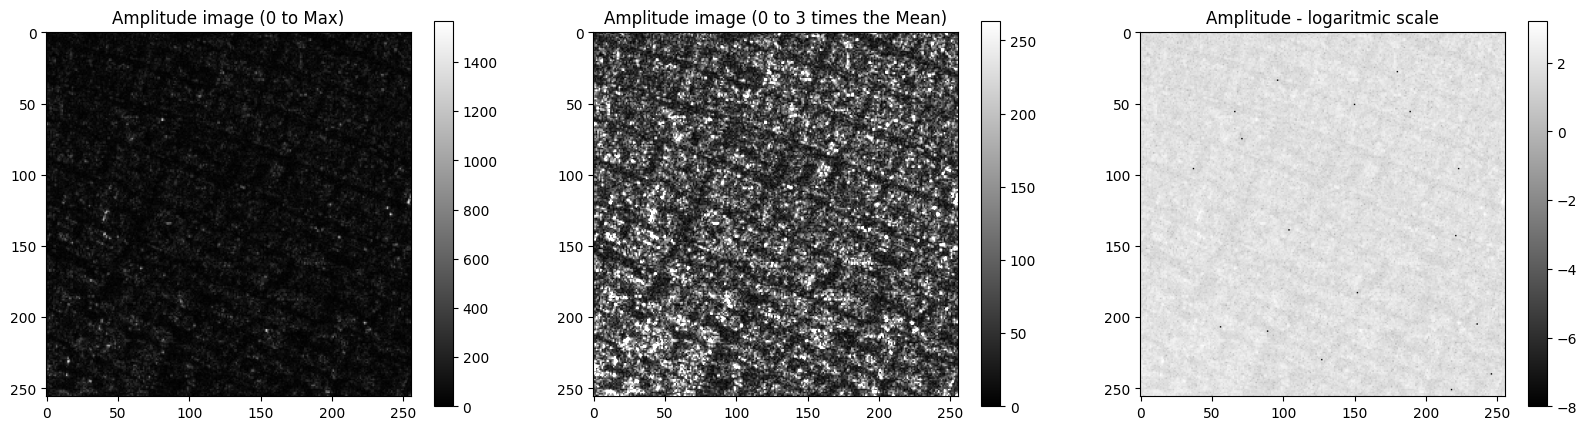

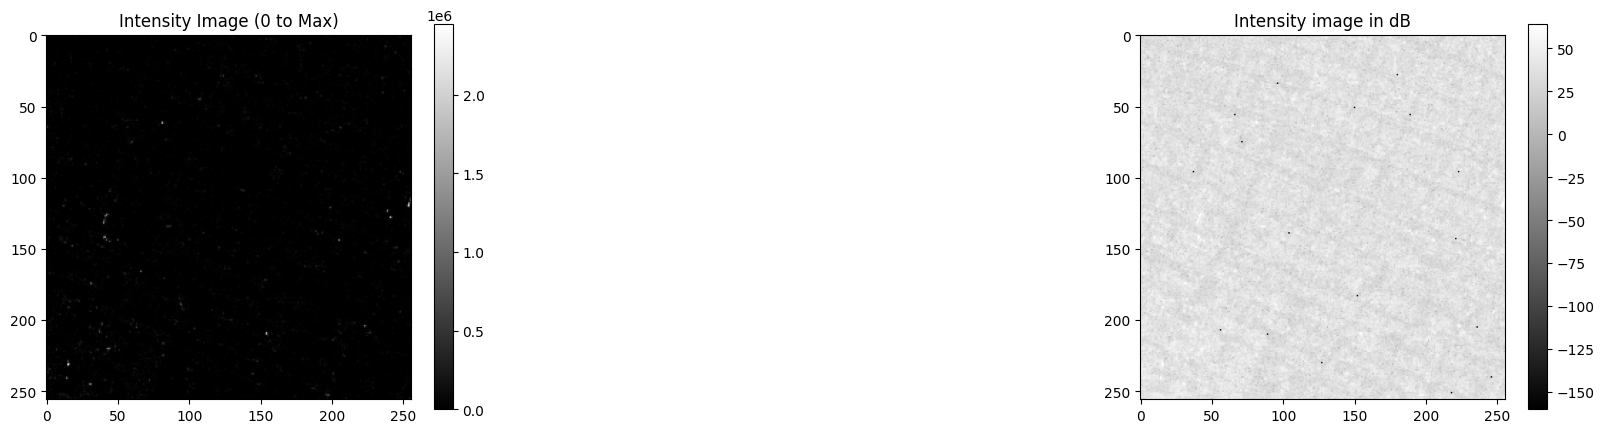

In [ ]:
## Amplitude ##
plt.figure(figsize=(20, 5))
# Between 0 and its maximum
plt.subplot(1, 3, 1)
plt.imshow(amplitude, cmap='gray', vmin=0, vmax=np.max(amplitude))
plt.title('Amplitude image (0 to Max)')
plt.colorbar()

# Between 0 and 3 times the mean
mean_amplitude = np.mean(amplitude)
plt.subplot(1, 3, 2)
plt.imshow(amplitude, cmap='gray', vmin=0, vmax=3*mean_amplitude)
plt.title('Amplitude image (0 to 3 times the Mean)')
plt.colorbar()

# Logaritmic scale
amplitude_log = np.log10(amplitude + 1e-8)
plt.subplot(1, 3, 3)
plt.imshow(amplitude_log, cmap='gray')
plt.title('Amplitude - logaritmic scale')
plt.colorbar()
plt.show()



## Intensity ##
plt.figure(figsize=(20, 5))
# linear between 0 and the maximum
plt.subplot(1, 3, 1)
plt.imshow(intensity, cmap='gray', vmin=0, vmax=np.max(intensity))
plt.title('Intensity Image (0 to Max)')
plt.colorbar()


# in decibel (dB)
intensity_db = 20 * np.log10(amplitude + 1e-8)
plt.subplot(1, 3, 3)
plt.imshow(intensity_db, cmap='gray')
plt.title('Intensity image in dB')
plt.colorbar()
plt.show()

## **Data normalization**

The proposed normalization of SAR data involves applying a **logarithmic transformation** followed by **clipping** and **normalization** between a specified minimum and maximum value. This transformation is typically performed on the quantity of interest, which can be the **amplitude**, **intensity**, or the **real** or **imaginary** parts of the SAR data. The goal is to ensure that the data is scaled appropriately for downstream machine learning tasks or analysis, while preserving key information.

#### Normalization Strategy

Normalization should be applied to the specific data type (amplitude, intensity, or complex components) that is relevant to the analysis. The choice of minimum and maximum values for the normalization range can be determined through **sensor-specific power values** (in decibels, dB), which reflect the characteristics of the SAR system. Alternatively, these thresholds can be computed based on the dataset itself using an **empirical strategy**.

For instance, the minimum and maximum values can be set using the **10th and 90th percentiles** of the data distribution. This percentile-based approach helps to avoid the influence of outliers by ensuring that the normalization focuses on the central range of the data, providing more robust scaling.

#### Clipping and Thresholding

Clipping ensures that values outside the defined range are adjusted to fall within the limits, which can be useful to reduce the effect of extreme values or noise. When normalizing SAR data in decibel (dB) scale, this thresholding helps manage variations between different sensors or acquisitions.

It is important to note that **log transformation and normalization** can be applied not only to **real-valued SAR data** but also to **complex-valued data**. For complex SAR data, the amplitude of the data is scaled accordingly to the proposed strategy.

#### Practical Considerations

The choice of normalization parameters (min and max) may consider:
1. **Theoretical insight**: Knowledge of the sensor's specifications (e.g., expected power range in dB).
2. **Empirical analysis**: Percentile-based thresholds calculated directly from the dataset.

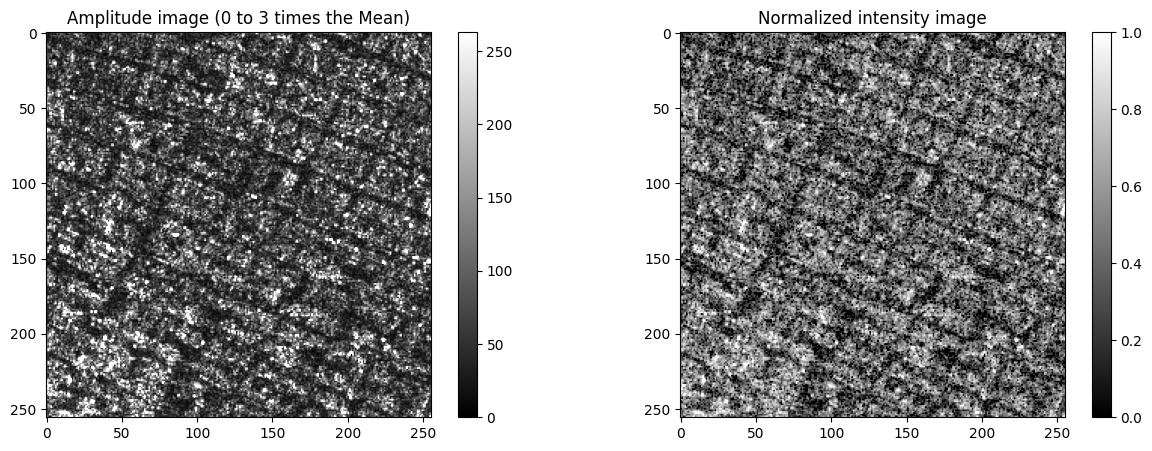

In [ ]:
# Number of looks (property of the data)
# SLCs have a number of looks equal to 1 by definition
looks = 1

# Minimum and maximum values in log-scale of the intensity (found empirically or through sensor-specific backscattered power)
max_value = 6
min_value = 3

# Normalization of the amplitude data
normalized_data = (np.log(np.square(amplitude) + 1e-9) - 2*min_value) / (2 * (max_value - min_value))

# Plots
plt.figure(figsize=(15, 5))

# Between 0 and 3 times the mean
plt.subplot(1, 2, 1)
mean_amplitude = np.mean(amplitude)
plt.imshow(amplitude, cmap='gray', vmin=0, vmax=3*mean_amplitude)
plt.title('Amplitude image (0 to 3 times the Mean)')
plt.colorbar()

# Log-transformed normalized amplitude
plt.subplot(1, 2, 2)
plt.imshow(normalized_data, cmap='gray', vmin=0, vmax=1)
plt.title('Normalized intensity image')
plt.colorbar()
plt.show()



(array([5.58220021e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.11906848e-03, 1.68575938e-03, 5.06740507e-03,
        1.56121381e-02, 5.13933097e-02, 1.49927635e-01, 3.51574291e-01,
        5.33574381e-01, 3.90925775e-01, 1.10253383e-01, 1.81399599e-02,
        2.99177656e-03, 5.93564730e-04, 1.34077964e-04, 3.37872575e-05,
        5.16058172e-06, 6.81587327e-07]),
 array([-20.7232666 , -20.11111832, -19.49897003, -18.88682175,
        -18.27467155, -17.6625

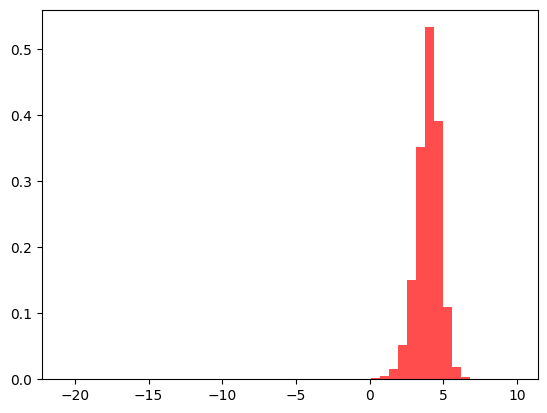

In [ ]:
## Determination of max and min values for our log-transformation

# Let's suppose that the full image is a good representation for the whole dataset

# Sample SAR data - Full image
sar_image = np.load('sar_image.npy')

# Log-transform
log_intensity = np.log(np.abs(sar_image) + 1e-9)

# Plot histogram
plt.figure()
plt.hist(log_intensity.ravel(), bins=50, density=True, color='red', alpha=0.7)


After the ML processing (training and test), SAR data need to be denormalized by inverting the previous operation:

In [ ]:
# Denormalization

amplitude_denormalized = np.exp(((max_value - min_value) * np.clip(np.squeeze(normalized_data), 0, 1) + min_value))




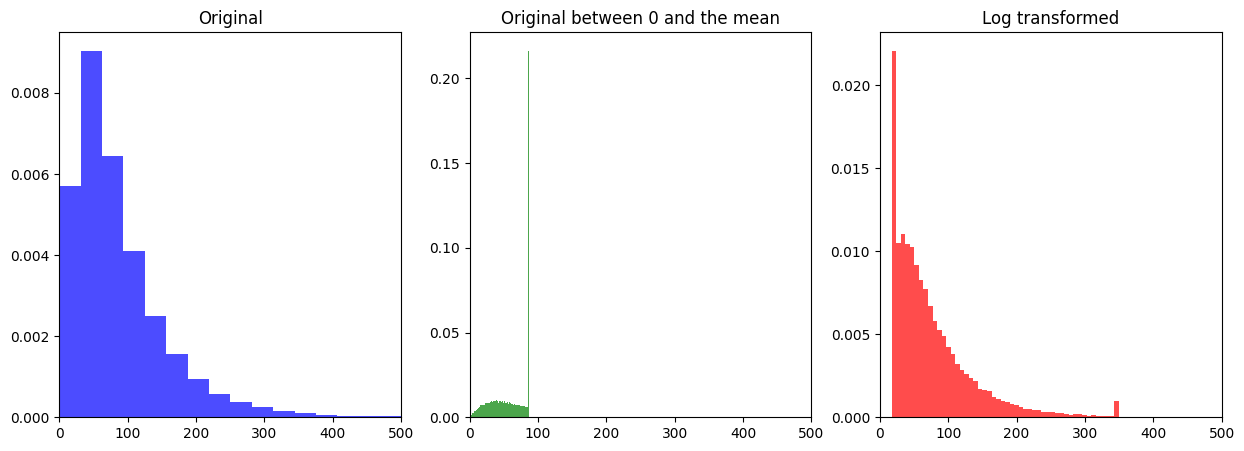

In [ ]:
# Histograms

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.hist(amplitude.ravel(), bins=50, density=True, color='blue', alpha=0.7)
plt.xlim(0, 500)
plt.title('Original')

plt.subplot(1,3,2)
plt.hist(np.clip(amplitude, 0, mean_amplitude).ravel(), bins=50, density=True, color='green', alpha=0.7)
plt.xlim(0, 500)
plt.title('Original between 0 and the mean')

plt.subplot(1,3,3)
plt.hist(amplitude_denormalized.ravel(), bins=50, density=True, color='red', alpha=0.7)
plt.xlim(0, 500)
plt.title('Log transformed')
plt.show()